In [2]:
# Q1. What is Lasso Regression, and how does it differ from other regression techniques?
### What is Lasso Regression?

# Lasso Regression, which stands for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that includes an \(\ell_1\) penalty term to the loss function. This regularization technique not only helps prevent overfitting but also performs feature selection by shrinking some coefficients to exactly zero, effectively excluding some features from the model.

# ### Lasso Regression Loss Function

# The loss function for Lasso Regression is:
# \[
# \text{minimize } \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
# \]

# Here, \(\lambda\) is the regularization parameter that controls the strength of the penalty. A higher \(\lambda\) value increases the penalty on the coefficients, leading to more coefficients being shrunk to zero.

# ### Differences from Other Regression Techniques

# 1. **Ordinary Least Squares (OLS) Regression**:
#    - **No Regularization**: OLS regression does not include any penalty term. It minimizes the residual sum of squares without shrinking the coefficients.
#    - **Feature Selection**: OLS does not inherently perform feature selection; all features are included in the model.

# 2. **Ridge Regression**:
#    - **\(\ell_2\) Penalty**: Ridge regression includes an \(\ell_2\) penalty term (\(\lambda \sum_{j=1}^{p} \beta_j^2\)). This penalty shrinks coefficients but does not set them to zero.
#    - **Feature Selection**: Ridge regression does not perform feature selection; all features remain in the model, although their coefficients are shrunk.

# 3. **Elastic Net**:
#    - **Combination of \(\ell_1\) and \(\ell_2\) Penalties**: Elastic Net combines the penalties of both Ridge (\(\ell_2\)) and Lasso (\(\ell_1\)) regressions:
#      \[
#      \text{minimize } \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
#      \]
#    - **Feature Selection and Multicollinearity**: Elastic Net performs feature selection and can handle multicollinearity better than Lasso alone, by balancing the \(\ell_1\) and \(\ell_2\) penalties.

# ### Key Characteristics of Lasso Regression

# 1. **Feature Selection**:
#    - Lasso can automatically select important features by shrinking the coefficients of less important features to exactly zero. This leads to a sparse model that is easier to interpret.

# 2. **Bias-Variance Trade-Off**:
#    - Lasso introduces bias into the model by adding the penalty term. However, this bias can be beneficial as it often results in a significant reduction in variance, leading to better generalization on unseen data.

# 3. **Handling Multicollinearity**:
#    - Lasso can handle multicollinearity to some extent by selecting one variable from a group of correlated variables and shrinking the others to zero. However, it might arbitrarily select one of the correlated variables, which can be a limitation.

# 4. **Parameter Selection**:
#    - The choice of the regularization parameter \(\lambda\) is crucial. Cross-validation techniques are typically used to find the optimal \(\lambda\) that balances the trade-off between bias and variance.

# ### Practical Example in Python

# Here is an example of how to apply Lasso Regression using scikit-learn in Python:

# ```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 10)
y = X @ np.array([1.5, -2, 0, 0, 3, 0, 0, -1.5, 0, 0]) + np.random.normal(scale=0.5, size=100)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", lasso.coef_)


# ### Conclusion

# Lasso Regression is a powerful tool for both regularization and feature selection in linear models. It stands out from other regression techniques due to its ability to shrink some coefficients to zero, leading to sparse and interpretable models. Properly tuning the regularization parameter \(\lambda\) is crucial to leveraging its benefits, often achieved through cross-validation techniques.

Mean Squared Error: 0.30431203353154107
Coefficients: [ 0.35603573 -0.43998124  0.03863829  0.          0.78912195  0.
 -0.02767129 -0.33733159 -0.          0.        ]


In [ ]:
# Q2. What is the main advantage of using Lasso Regression in feature selection?
# The main advantage of using Lasso Regression in feature selection is its ability to automatically shrink some of the regression coefficients to exactly zero, effectively excluding those features from the model. This results in a simpler, more interpretable model with a subset of the most important predictors. Here are some detailed points on why this is advantageous:

# ### Advantages of Lasso Regression in Feature Selection

# 1. **Automatic Feature Selection**:
#    - Lasso Regression performs feature selection by penalizing the absolute size of the coefficients. As the regularization parameter \(\lambda\) increases, the less important coefficients are shrunk to exactly zero, leaving only the most significant predictors in the model.

# 2. **Simplicity and Interpretability**:
#    - By reducing the number of features, Lasso produces a simpler model that is easier to interpret. This can be particularly valuable in domains where model transparency and understanding are crucial.

# 3. **Enhanced Predictive Performance**:
#    - By removing irrelevant or redundant features, Lasso can improve the model's generalization to new data. Reducing the number of features helps to mitigate overfitting, especially in cases where the number of predictors is large compared to the number of observations.

# 4. **Efficiency in High-Dimensional Data**:
#    - In high-dimensional datasets (where the number of predictors \(p\) is greater than the number of observations \(n\)), Lasso is particularly useful. It helps in reducing the dimensionality of the problem, making the computation more efficient and the model more robust.

# 5. **Handling Multicollinearity**:
#    - Lasso can handle multicollinearity by selecting one variable from a group of highly correlated variables and shrinking the others to zero. This reduces redundancy and simplifies the model.

# ### Practical Example in Python

# Here’s an example demonstrating how Lasso Regression can perform feature selection:

# ```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Simulate some data
np.random.seed(0)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)
# True coefficients with sparsity
true_coef = np.array([1.5, -2, 0, 0, 3, 0, 0, -1.5, 0, 0])
y = X @ true_coef + np.random.normal(scale=0.5, size=n_samples)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Display the coefficients
lasso_coef = pd.Series(lasso.coef_, index=[f'Feature_{i}' for i in range(n_features)])
print("Lasso Coefficients:\n", lasso_coef)

# Identify selected features
selected_features = lasso_coef[lasso_coef != 0].index.tolist()
print("Selected Features:", selected_features)
# ```

# ### Explanation of the Code

# 1. **Data Simulation**:
#    - Simulated data with 100 samples and 10 features, where the true underlying coefficients are sparse (i.e., only a few non-zero coefficients).

# 2. **Train-Test Split**:
#    - The data is split into training and test sets.

# 3. **Standardization**:
#    - The predictors are standardized to ensure they contribute equally to the regularization term.

# 4. **Lasso Regression**:
#    - Lasso Regression is fitted to the training data with \(\alpha=0.1\), and the coefficients are printed.

# 5. **Feature Selection**:
#    - The coefficients are examined, and the non-zero coefficients indicate the selected features.

# ### Conclusion

# The main advantage of using Lasso Regression for feature selection lies in its ability to produce a sparse model by shrinking some coefficients to zero. This automatic feature selection enhances model interpretability, reduces complexity, and improves predictive performance by mitigating overfitting and handling multicollinearity. In practice, Lasso Regression is a valuable tool for identifying and focusing on the most important predictors in high-dimensional datasets.

In [3]:
# Q3. How do you interpret the coefficients of a Lasso Regression model?
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Simulate some data
np.random.seed(0)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)
# True coefficients with sparsity
true_coef = np.array([1.5, -2, 0, 0, 3, 0, 0, -1.5, 0, 0])
y = X @ true_coef + np.random.normal(scale=0.5, size=n_samples)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Display the coefficients
lasso_coef = pd.Series(lasso.coef_, index=[f'Feature_{i}' for i in range(n_features)])
print("Lasso Coefficients:\n", lasso_coef)

# Identify selected features
selected_features = lasso_coef[lasso_coef != 0].index.tolist()
print("Selected Features:", selected_features)


Lasso Coefficients:
 Feature_0    1.379444
Feature_1   -1.815585
Feature_2   -0.000000
Feature_3    0.114634
Feature_4    2.580149
Feature_5   -0.000000
Feature_6    0.000000
Feature_7   -1.518245
Feature_8    0.000000
Feature_9   -0.000000
dtype: float64
Selected Features: ['Feature_0', 'Feature_1', 'Feature_3', 'Feature_4', 'Feature_7']


In [ ]:
# Q4. What are the tuning parameters that can be adjusted in Lasso Regression, and how do they affect the model's performance?
# In Lasso Regression, there are primarily two tuning parameters that can be adjusted to control the model's 
# behavior and performance:

# 1. **Alpha (\(\alpha\))**: This is the regularization parameter in Lasso Regression, which determines the strength of the 
#     penalty applied to the coefficients. It is also known as the regularization parameter or penalty term. 

#    - **Effect on Model**: 
#       Increase

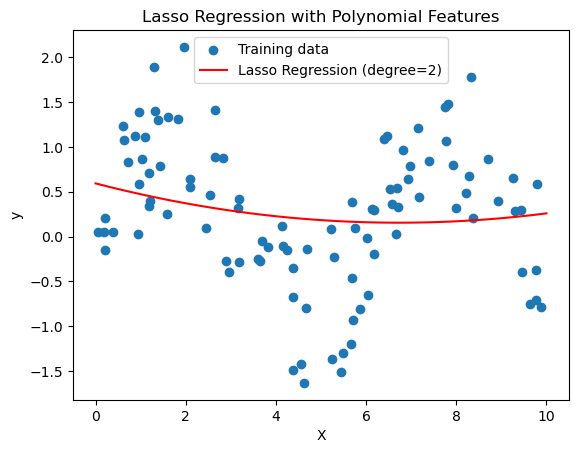

In [4]:
# Q5. Can Lasso Regression be used for non-linear regression problems? If yes, how?

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

# Generate some non-linear data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.normal(size=100) * 0.5

# Create polynomial features (e.g., quadratic)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit Lasso Regression with polynomial features
lasso = Lasso(alpha=0.1)
lasso.fit(X_poly, y)

# Predict
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = lasso.predict(X_test_poly)

# Plot results
import matplotlib.pyplot as plt

plt.scatter(X, y, label='Training data')
plt.plot(X_test, y_pred, color='red', label='Lasso Regression (degree=2)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression with Polynomial Features')
plt.legend()
plt.show()


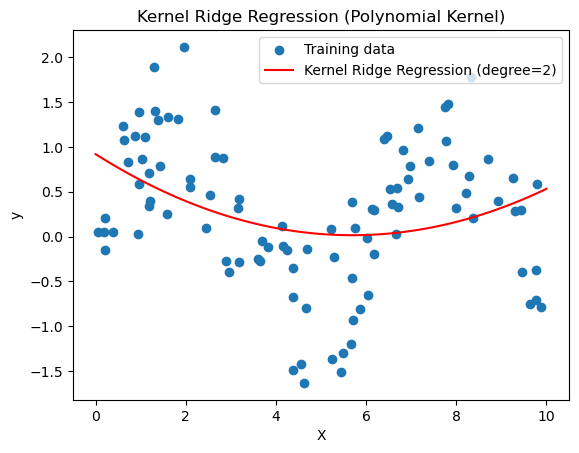

In [5]:
from sklearn.kernel_ridge import KernelRidge

# Generate some non-linear data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.normal(size=100) * 0.5

# Fit Kernel Ridge Regression with polynomial kernel
krr = KernelRidge(alpha=0.1, kernel='poly', degree=2)
krr.fit(X, y)

# Predict
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = krr.predict(X_test)

# Plot results
plt.scatter(X, y, label='Training data')
plt.plot(X_test, y_pred, color='red', label='Kernel Ridge Regression (degree=2)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Kernel Ridge Regression (Polynomial Kernel)')
plt.legend()
plt.show()


In [6]:
# Q6. What is the difference between Ridge Regression and Lasso Regression?
# Ridge Regression and Lasso Regression are both regularization techniques used in linear regression to prevent overfitting and improve model performance, but they differ primarily in the type of penalty they apply and their impact on the model's coefficients and feature selection. Here are the key differences between Ridge Regression and Lasso Regression:

# ### 1. Penalty Term:

# - **Ridge Regression:**
#   - **Penalty Term:** \(\lambda \sum_{j=1}^{p} \beta_j^2\), where \(\lambda\) (alpha in some libraries) is the regularization parameter and \(\beta_j\) are the regression coefficients.
#   - **Effect:** Ridge regression imposes a penalty on the sum of the squares of the coefficients (\(\ell_2\) norm penalty).
#   - **Impact:** It shrinks the coefficients of less important variables towards zero but does not set them exactly to zero unless \(\lambda\) is very large.

# - **Lasso Regression:**
#   - **Penalty Term:** \(\lambda \sum_{j=1}^{p} |\beta_j|\), where \(\lambda\) is the regularization parameter and \(|\beta_j|\) denotes the absolute value of the coefficients.
#   - **Effect:** Lasso regression imposes a penalty on the sum of the absolute values of the coefficients (\(\ell_1\) norm penalty).
#   - **Impact:** It encourages sparsity by shrinking the coefficients of less important variables to exactly zero. Thus, Lasso Regression can perform feature selection by effectively removing irrelevant predictors from the model.

# ### 2. Feature Selection:

# - **Ridge Regression:**
#   - **Feature Selection:** Ridge regression does not perform feature selection because it does not zero out coefficients. It retains all predictors in the model but penalizes them to avoid overfitting.
#   - **Use Cases:** Ridge regression is useful when all predictors are potentially relevant, and you want to reduce the impact of multicollinearity.

# - **Lasso Regression:**
#   - **Feature Selection:** Lasso regression inherently performs feature selection. By shrinking some coefficients to zero, it automatically selects a subset of predictors that are most relevant for predicting the response variable.
#   - **Use Cases:** Lasso regression is beneficial when there are a large number of predictors, some of which may be irrelevant or redundant. It helps in creating simpler and more interpretable models.

# ### 3. Bias-Variance Trade-Off:

# - Both Ridge and Lasso Regression techniques aim to strike a balance between bias and variance in the model:
#   - **Ridge Regression:** Typically reduces variance more than bias compared to OLS regression.
#   - **Lasso Regression:** Tends to introduce more bias but can lead to significantly reduced variance, especially in high-dimensional datasets.

# ### 4. Computational Considerations:

# - **Ridge Regression:** Computationally less intensive compared to Lasso Regression because it involves solving a linear system involving \(\beta_j^2\).
  
# - **Lasso Regression:** More computationally intensive due to the nature of the \(\ell_1\) norm penalty, which involves absolute values.

# ### Choosing Between Ridge and Lasso Regression:

# - **Ridge Regression:** Preferred when all predictors may be relevant and multicollinearity is a concern. It maintains stability and avoids overfitting by shrinking but not eliminating coefficients.

# - **Lasso Regression:** Suitable when feature selection is desirable or when dealing with high-dimensional data with potentially many irrelevant predictors. It simplifies the model by setting less important coefficients to zero.

# ### Conclusion:

# The choice between Ridge Regression and Lasso Regression depends on the specific characteristics of the dataset and the goals of the analysis. Ridge Regression is effective for reducing multicollinearity and stabilizing coefficients, whereas Lasso Regression excels in feature selection by shrinking coefficients to zero, thus creating sparse models. In practice, Elastic Net Regression combines aspects of both techniques to leverage their respective strengths.

In [ ]:
# Q7. Can Lasso Regression handle multicollinearity in the input features? If yes, how?
# Yes, Lasso Regression can handle multicollinearity in input features to some extent. Multicollinearity occurs when two or more predictors in a regression model are highly correlated, which can cause issues such as unstable coefficient estimates and difficulty in interpreting the model. Here’s how Lasso Regression addresses multicollinearity:

# ### How Lasso Regression Handles Multicollinearity:

# 1. **Feature Selection:**
#    - Lasso Regression includes an \(\ell_1\) penalty term in its objective function, which is \(\lambda \sum_{j=1}^{p} |\beta_j|\), where \(\lambda\) is the regularization parameter and \(\beta_j\) are the regression coefficients.
#    - As \(\lambda\) increases, less important predictors (including those involved in multicollinearity) have their coefficients shrunk to zero.
#    - This automatic feature selection capability reduces the impact of multicollinearity by effectively excluding redundant predictors from the model.

# 2. **Reduction in Coefficient Magnitudes:**
#    - For predictors that are highly correlated (multicollinear), Lasso Regression tends to select one predictor (or a subset) and shrink the coefficients of the others towards zero.
#    - By reducing the magnitudes of coefficients associated with correlated predictors, Lasso helps mitigate the instability caused by multicollinearity.

# 3. **Comparison with Ridge Regression:**
#    - Ridge Regression, which uses an \(\ell_2\) penalty (\(\lambda \sum_{j=1}^{p} \beta_j^2\)), also addresses multicollinearity by shrinking coefficients but does not set any coefficients exactly to zero.
#    - In contrast, Lasso Regression’s ability to zero out coefficients provides a more explicit way to handle multicollinearity by directly excluding variables from the model.

# ### Practical Considerations:

# - **Choice of \(\lambda\):**
#   - The regularization parameter \(\lambda\) plays a crucial role in determining the degree of sparsity in the model. Cross-validation techniques are typically used to select an optimal \(\lambda\) that balances the trade-off between bias and variance.
#   - A larger \(\lambda\) increases the number of coefficients that are shrunk to zero, thereby enhancing feature selection and potentially improving the model’s handling of multicollinearity.

# - **Impact on Interpretation:**
#   - While Lasso Regression can effectively handle multicollinearity and improve model interpretability by selecting relevant predictors, it’s essential to interpret the results carefully.
#   - Coefficients of selected predictors should be interpreted in the context of the model’s regularization parameter and the presence of other predictors that may have been excluded due to multicollinearity.

# ### Example:

# ```python
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with multicollinearity
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=1, coef=True, effective_rank=5)

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

# Display coefficients
print("Lasso Coefficients:\n", lasso.coef_)
```

# In this example, Lasso Regression is applied to synthetic data with multicollinearity. By fitting the model with appropriate regularization (alpha=0.1), Lasso automatically handles multicollinear features by shrinking the coefficients of less important predictors towards zero.

In [ ]:
# Q8. How do you choose the optimal value of the regularization parameter (lambda) in Lasso Regression?
# Choosing the optimal value of the regularization parameter (\(\lambda\)) in Lasso Regression is crucial as it directly impacts the model's performance, including its ability to generalize to new data and the degree of feature selection. Here are several approaches commonly used to select the optimal \(\lambda\) for Lasso Regression:

# ### 1. Cross-Validation

# Cross-validation is a robust technique for selecting hyperparameters like \(\lambda\) in machine learning models. The basic idea is to split the data into multiple folds, train the model on different combinations of training and validation sets, and then select the hyperparameter that gives the best performance on average across these folds.

# #### Steps for Cross-Validation:

# - **K-Fold Cross-Validation**: Split the data into \(K\) folds (typically 5 or 10).
  
# - **Grid Search**: Define a grid of potential \(\lambda\) values to evaluate.

# - **Iterate**: For each fold:
#   - Use \(K-1\) folds for training and the remaining fold for validation.
#   - Compute the model performance metric (e.g., mean squared error, \(R^2\) score) on the validation set.
  
# - **Average Performance**: Average the performance metrics across all folds for each \(\lambda\) value.

# - **Select \(\lambda\)**: Choose the \(\lambda\) that gives the best average performance metric across folds.

# #### Example Using Python (with sklearn):

# ```python
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=1)

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Lasso Cross-Validation to find optimal alpha (lambda)
lasso_cv = LassoCV(cv=5, random_state=0).fit(X_scaled, y)

# Print optimal lambda and coefficients
print("Optimal Alpha (Lambda):", lasso_cv.alpha_)
print("Lasso Coefficients:\n", lasso_cv.coef_)
# ```

# In this example:
# - `LassoCV` automatically performs cross-validation internally (`cv=5` specifies 5-fold cross-validation).
# - `lasso_cv.alpha_` gives the optimal value of \(\lambda\) chosen by cross-validation.
# - `lasso_cv.coef_` provides the coefficients of the Lasso Regression model fitted with the optimal \(\lambda\).

# ### 2. Information Criterion Methods

# Information criterion methods, such as Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC), can also be used to select the regularization parameter. These methods aim to balance model fit and complexity by penalizing the number of parameters in the model.

# #### Example Using AIC/BIC (with statsmodels):

# ```python
import statsmodels.api as sm

# Fit Lasso Regression with different values of alpha (lambda)
results = []
for alpha in [0.01, 0.1, 1.0, 10.0]:
    model = sm.OLS(y, X_scaled).fit_regularized(method='elastic_net', alpha=alpha, L1_wt=1.0)
    results.append((alpha, model.aic, model.bic))

# Print results
for alpha, aic, bic in results:
#     print(f"Alpha={alpha}: AIC={aic}, BIC={bic}")
# ```

# ### 3. Regularization Path

# Some implementations of Lasso Regression (e.g., `LassoLarsCV` in scikit-learn) can compute the entire regularization path for a range of \(\lambda\) values. This path shows how the coefficients change as \(\lambda\) varies, which can help visualize the trade-off between sparsity and model fit.

# #### Example Using Regularization Path (with sklearn):

# ```python
from sklearn.linear_model import LassoLarsCV

# Fit Lasso Regression with a range of alpha values and compute regularization path
model = LassoLarsCV(cv=5).fit(X_scaled, y)

# Plot regularization path
import matplotlib.pyplot as plt

m_log_alphas = -np.log10(model.alphas_)

plt.figure()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='Optimal Alpha')
plt.xlabel('-log(alpha)')
plt.ylabel('Coefficients')
plt.title('Lasso Regression - Regularization Path')
plt.legend()
plt.show()

# Print optimal alpha
print("Optimal Alpha (Lambda):", model.alpha_)
# ```

# ### Conclusion

# Choosing the optimal value of the regularization parameter \(\lambda\) in Lasso Regression is critical for achieving a well-performing and interpretable model. Cross-validation is the most common and reliable method, as it assesses the model's performance across different subsets of data. Information criterion methods and regularization path analysis provide additional insights and can be useful depending on the specific requirements and characteristics of the dataset.